# **E-Commerce Dataset EDA**

<div class="alert alert-success">  
<h3><strong>Imports</strong></h3>
</div>

In [8]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
# from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates
from IPython.display import display, Markdown
# import datasist as ds

# for providing path
import os

# print(os.listdir("../input"))

# for modelling
import sklearn
# import imblearn

# set seaborn styles
sns.set(style="whitegrid")

In [9]:
df = pd.read_excel('ecommerce.xlsx')

In [10]:
df.head()

,Unnamed: 0,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,1400,2,...,460,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,2110,3,...,1120,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,1170,5,...,310,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,1180,2,...,260,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,2500,1,...,160,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [11]:
#Membuat nama kolom menjadi format yang mudah diolah oleh pandas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51300 entries, 0 to 51299
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   unnamed:_0        51300 non-null  int64         
 1   order_id          51300 non-null  object        
 2   order_date        51300 non-null  datetime64[ns]
 3   ship_date         51300 non-null  datetime64[ns]
 4   aging             51300 non-null  float64       
 5   ship_mode         51300 non-null  object        
 6   product_category  51300 non-null  object        
 7   product           51300 non-null  object        
 8   sales             51300 non-null  int64         
 9   quantity          51300 non-null  int64         
 10  discount          51300 non-null  float64       
 11  profit            51300 non-null  int64         
 12  shipping_cost     51300 non-null  int64         
 13  order_priority    51300 non-null  object        
 14  customer_id       5130

<div class="alert alert-success">  
<h3><strong>Simple Statistic Data</strong></h3>
</div>

In [13]:
df.describe()

,unnamed:_0,order_date,ship_date,aging,sales,quantity,discount,profit,shipping_cost
count,51300.000000,51300,51300,51300.000000,51300.000000,51300.000000,51300.000000,51300.000000,51300.000000
mean,25652.479259,2015-07-02 09:50:34.105263360,2015-07-07 14:38:30.736842240,5.255044,1564.078168,2.997310,0.029972,7271.159259,658.748928
min,0.000000,2015-01-01 00:00:00,2015-01-01 00:00:00,1.000000,0.000000,1.000000,0.010000,50.000000,10.000000
25%,12827.750000,2015-04-02 00:00:00,2015-04-07 00:00:00,3.000000,1090.000000,2.000000,0.020000,2570.000000,190.000000
50%,25652.500000,2015-07-03 00:00:00,2015-07-08 00:00:00,5.000000,1590.000000,3.000000,0.030000,6700.000000,460.000000
75%,38477.250000,2015-10-02 00:00:00,2015-10-07 00:00:00,8.000000,2180.000000,4.000000,0.040000,12060.000000,1160.000000
max,51302.000000,2016-01-02 00:00:00,2016-01-10 00:00:00,10.500000,2500.000000,5.000000,0.050000,16750.000000,1680.000000
std,14809.214384,NaN,NaN,2.959598,657.838217,1.413246,0.014113,4909.602208,504.618010


In [42]:
def describe_detail(df):
    # Display function with Markdown for titles
    def display_markdown(title):
        display(Markdown(f"**{title}**"))

    # (a) First five data points
    display_markdown('First five data points')
    display(df.head())

    # (b) Random five data points
    display_markdown('Random five data points')
    display(df.sample(5))

    # (c) Last five data points
    display_markdown('Last five data points')
    display(df.tail())

    # (d) Shape and Size of data set
    shape_size_df = pd.DataFrame({'Shape': [df.shape], 'Size': [df.size]})
    display_markdown('Shape and Size of dataset')
    display(shape_size_df)

    # (e) Data types
    data_types_df = pd.DataFrame(df.dtypes, columns=['Data Type'])
    display_markdown('Data types of columns')
    display(data_types_df)

    # (f) Numerical features in the dataset
    display_markdown('Numerical features in the dataset')
    display(df.select_dtypes(include=[np.number]).columns.tolist())

    # (g) Categorical features in the dataset
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    display_markdown('Categorical features in the dataset')
    display(categorical_features)

    # (h) Statistical Description of Columns
    display_markdown('Statistical Description of Numerical Columns')
    display(df.describe())

    # (i) Description of Categorical features
    display_markdown('Description of Categorical Features')
    display(df.describe(include=['object', 'category']))

    # (j) Unique class count of Categorical features
    unique_counts_df = pd.DataFrame(df[categorical_features].nunique(), columns=['Unique Count'])
    display_markdown('Unique class count of Categorical features')
    display(unique_counts_df)

    # (k) Missing values in data
    missing_values_df = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]
    display_markdown('Missing values in data')
    display(missing_values_df)

# Assuming 'df' is your DataFrame
describe_detail(df)

**First five data points**

,unnamed:_0,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
0,0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,1400.0,2,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov,8
1,1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,2110.0,3,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun,2
2,2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,1170.0,5,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec,8
3,3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,1180.0,2,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May,7
4,4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,2500.0,1,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul,9


**Random five data points**

,unnamed:_0,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
32667,32670,FA-2015-12156,2015-11-18,2015-11-28,10.0,Standard Class,Fashion,T - Shirts,2480.0,2,...,Medium,ER-0022362,Montoya Ritter,Corporate,Phoenix,Arizona,United States,West,Nov,10
9847,9850,El-2015-2346,2015-02-08,2015-02-08,1.0,Same Day,Electronic,Watch,1040.0,3,...,High,RD-009851,Hill Ballard,Corporate,Oakville,Ontario,Canada,Canada,Feb,0
13999,14002,HF-2015-3797,2015-12-07,2015-12-13,6.0,Second Class,Home & Furniture,Dinning Tables,1190.0,3,...,Medium,RA-0044778,Harrison Carreira,Consumer,Buenos Aires,Buenos Aires,Argentina,South,Dec,6
50680,50683,FA-2015-30169,2015-05-08,2015-05-11,3.0,Standard Class,Fashion,Sneakers,620.0,1,...,Medium,CE-0040375,Kane Wallace,Home Office,Saint-Ouen,Ile-de-France,France,Central,May,3
29647,29650,FA-2015-9136,2015-02-04,2015-02-07,3.0,Standard Class,Fashion,Casula Shoes,1220.0,1,...,High,TO-0019342,Carter Barreto,Corporate,Zaanstad,North Holland,Netherlands,Central,Feb,3


**Last five data points**

,unnamed:_0,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,...,order_priority,customer_id,customer_name,segment,city,state,country,region,months,lapsdays
51295,51298,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850.0,3,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51296,51299,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850.0,3,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51297,51300,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850.0,3,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51298,51301,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850.0,3,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4
51299,51302,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,850.0,3,...,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan,4


**Shape and Size of dataset**

,Shape,Size
0,"(51299, 23)",1179877


**Data types of columns**

,Data Type
unnamed:_0,int64
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
aging,float64
ship_mode,object
product_category,object
product,object
sales,float64
quantity,int64


**Numerical features in the dataset**

['unnamed:_0',
 'aging',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'lapsdays']

**Categorical features in the dataset**

['order_id',
 'ship_mode',
 'product_category',
 'product',
 'order_priority',
 'customer_id',
 'customer_name',
 'segment',
 'city',
 'state',
 'country',
 'region',
 'months']

**Statistical Description of Numerical Columns**

,unnamed:_0,order_date,ship_date,aging,sales,quantity,discount,profit,shipping_cost,lapsdays
count,51299.000000,51299,51299,51299.000000,51299.000000,51299.000000,51299.000000,51299.000000,51299.000000,51299.000000
mean,25652.973021,2015-07-02 09:51:10.165110528,2015-07-07 14:39:08.817715968,5.255068,1564.063627,2.997271,0.029972,7271.029065,658.734673,5.199984
min,0.000000,2015-01-01 00:00:00,2015-01-01 00:00:00,1.000000,0.000000,1.000000,0.010000,50.000000,10.000000,-106.000000
25%,12828.500000,2015-04-02 00:00:00,2015-04-07 00:00:00,3.000000,1090.000000,2.000000,0.020000,2570.000000,190.000000,3.000000
50%,25653.000000,2015-07-03 00:00:00,2015-07-08 00:00:00,5.000000,1590.000000,3.000000,0.030000,6700.000000,460.000000,5.000000
75%,38477.500000,2015-10-02 00:00:00,2015-10-07 00:00:00,8.000000,2180.000000,4.000000,0.040000,12060.000000,1160.000000,8.000000
max,51302.000000,2016-01-02 00:00:00,2016-01-10 00:00:00,10.500000,2500.000000,5.000000,0.050000,16750.000000,1680.000000,10.000000
std,14808.936448,NaN,NaN,2.959622,657.836385,1.413232,0.014112,4909.561502,504.612600,3.081987


**Description of Categorical Features**

,order_id,ship_mode,product_category,product,order_priority,customer_id,customer_name,segment,city,state,country,region,months
count,51299,51299,51299,51299,51299,51299,51299,51299,51299,51299,51299,51299,51299
unique,51290,4,4,42,4,51285,795,3,3636,1094,147,13,12
top,FA-2015-30775,Standard Class,Fashion,Sports Wear,Medium,RZ-0040981,Mcclain O'Donnell,Consumer,New York City,California,United States,Central,Jul
freq,10,30788,30788,2840,29447,15,108,26516,915,2001,9994,11116,4445


**Unique class count of Categorical features**

,Unique Count
order_id,51290
ship_mode,4
product_category,4
product,42
order_priority,4
customer_id,51285
customer_name,795
segment,3
city,3636
state,1094


**Missing values in data**

,Missing Values


<div class="alert alert-success">  
<h3><strong>Missing Values Info</strong></h3>
</div>

In [15]:
def display_missing(data):
    total_missing = data.isnull().sum()
    percent_missing = (data.isnull().sum() / data.shape[0] * 100)
    missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing': percent_missing})
    missing_data = missing_data[missing_data['Total Missing'] > 0]
    missing_data = missing_data.sort_values(by='Total Missing', ascending=False)

    return missing_data

missing_data = display_missing(df)
missing_data

,Total Missing,Percent Missing


In [16]:
#Bagi missing values fill caregorical -> Modus, Numerical --> Mean
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

#Loop untuk fill missing values
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

missing_data = display_missing(df)
missing_data

,Total Missing,Percent Missing


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51300 entries, 0 to 51299
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   unnamed:_0        51300 non-null  int64         
 1   order_id          51300 non-null  object        
 2   order_date        51300 non-null  datetime64[ns]
 3   ship_date         51300 non-null  datetime64[ns]
 4   aging             51300 non-null  float64       
 5   ship_mode         51300 non-null  object        
 6   product_category  51300 non-null  object        
 7   product           51300 non-null  object        
 8   sales             51300 non-null  int64         
 9   quantity          51300 non-null  int64         
 10  discount          51300 non-null  float64       
 11  profit            51300 non-null  int64         
 12  shipping_cost     51300 non-null  int64         
 13  order_priority    51300 non-null  object        
 14  customer_id       5130

<div class="alert alert-success">  
<h3><strong>Checking and Drop Unusual Data</strong></h3>
</div>

In [18]:
df['region'].replace({'4orth':'South'}, inplace=True)
df.drop(df.loc[df['quantity']=='abc',:].index, axis=0, inplace=True)
df.drop(df.loc[df['discount']=='xxx',:].index, axis=0, inplace=True)
df['discount'] = df['discount'].astype(float)


<div class="alert alert-success">  
<h3><strong>Delete Dollar Sign from Sales, Profit, Shipping Cost</strong></h3>
</div>


In [19]:
df['sales'] =df['sales'].astype(str).str.replace('[^\d,]','', regex=True).astype(float)
df['profit'] =df['profit'].astype(str).str.replace('[^\d,]','', regex=True).astype(float)
df['shipping_cost'] =df['shipping_cost'].astype(str).str.replace('[^\d,]','', regex=True).astype(float)
df.head()

,unnamed:_0,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,1400.0,2,...,460.0,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,2110.0,3,...,1120.0,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,1170.0,5,...,310.0,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,1180.0,2,...,260.0,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,2500.0,1,...,160.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


<div class="alert alert-success">  
<h3><strong>Visualisasi</strong></h3>
</div>

<div class="alert alert-success">  
<h3><strong>Ship Mode Distribution</strong></h3>
</div>


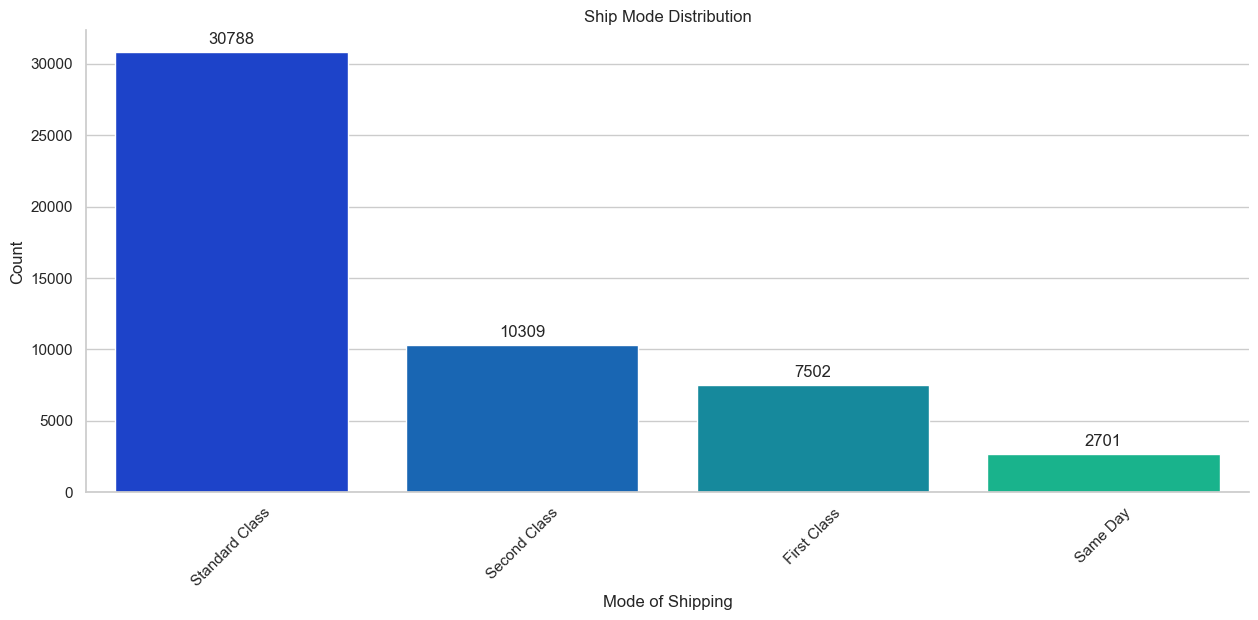

In [20]:
df_ship_mode = df['ship_mode'].value_counts().reset_index()
df_ship_mode.columns = ['ship_mode', 'count']

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=df_ship_mode, x='ship_mode', y='count', palette="winter")

ax.set_title('Ship Mode Distribution')
ax.set_xlabel('Mode of Shipping')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xticks(rotation=45)
sns.despine()

plt.show()

<div class="alert alert-success">  
<h3><strong>Count for Product Category</strong></h3>
</div>

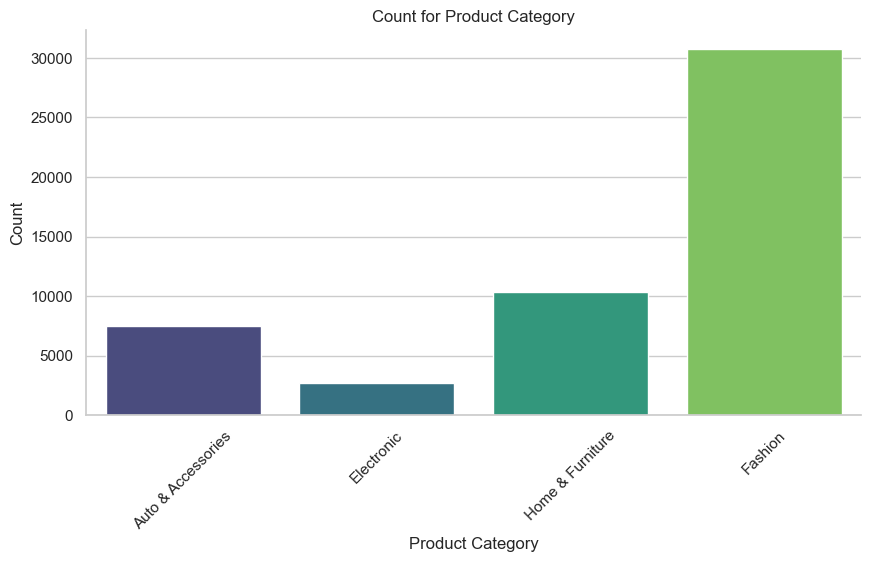

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='product_category', data=df, palette='viridis')

ax.set_title('Count for Product Category')

plt.xticks(rotation=45)
ax.set_xlabel('Product Category')
ax.set_ylabel('Count')

sns.despine()

plt.show()

<div class="alert alert-success">  
<h3><strong>Median Sales for Each Product Category by Ship Mode</strong></h3>
</div>

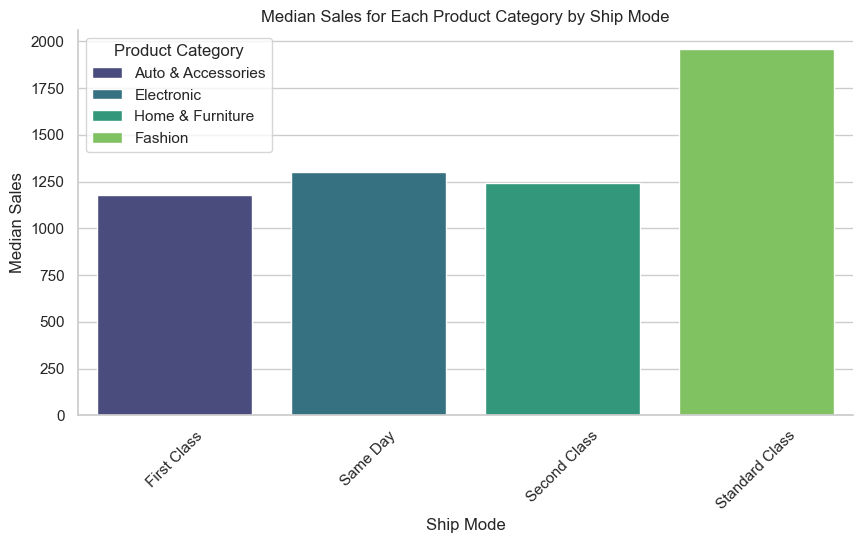

In [22]:
median_sales = df.groupby(['ship_mode', 'product_category'])['sales'].median().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='ship_mode', y='sales', hue='product_category', data=median_sales, palette='viridis')

ax.set_title('Median Sales for Each Product Category by Ship Mode')
ax.set_xlabel('Ship Mode')
ax.set_ylabel('Median Sales')

plt.legend(title='Product Category')

plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-success">  
<h3><strong>Mean Sales for Product Category</strong></h3>
</div>

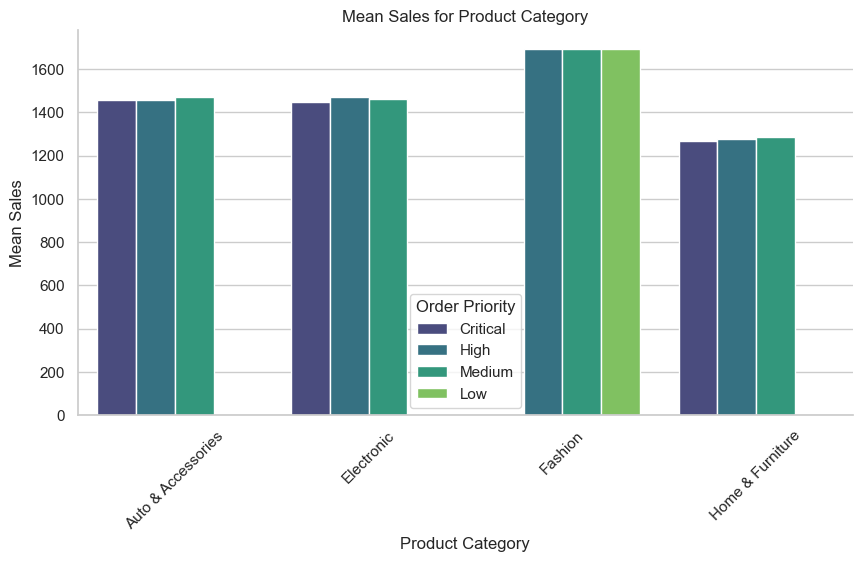

In [23]:
mean_sales = df.groupby(['product_category', 'order_priority'])['sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='product_category', y='sales', hue='order_priority', data=mean_sales, palette='viridis')

ax.set_title('Mean Sales for Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Mean Sales')

plt.legend(title='Order Priority')
plt.xticks(rotation=45)
sns.despine()

plt.show()

<div class="alert alert-success">  
<h3><strong>Top 20 States based on Sales</strong></h3>
</div>

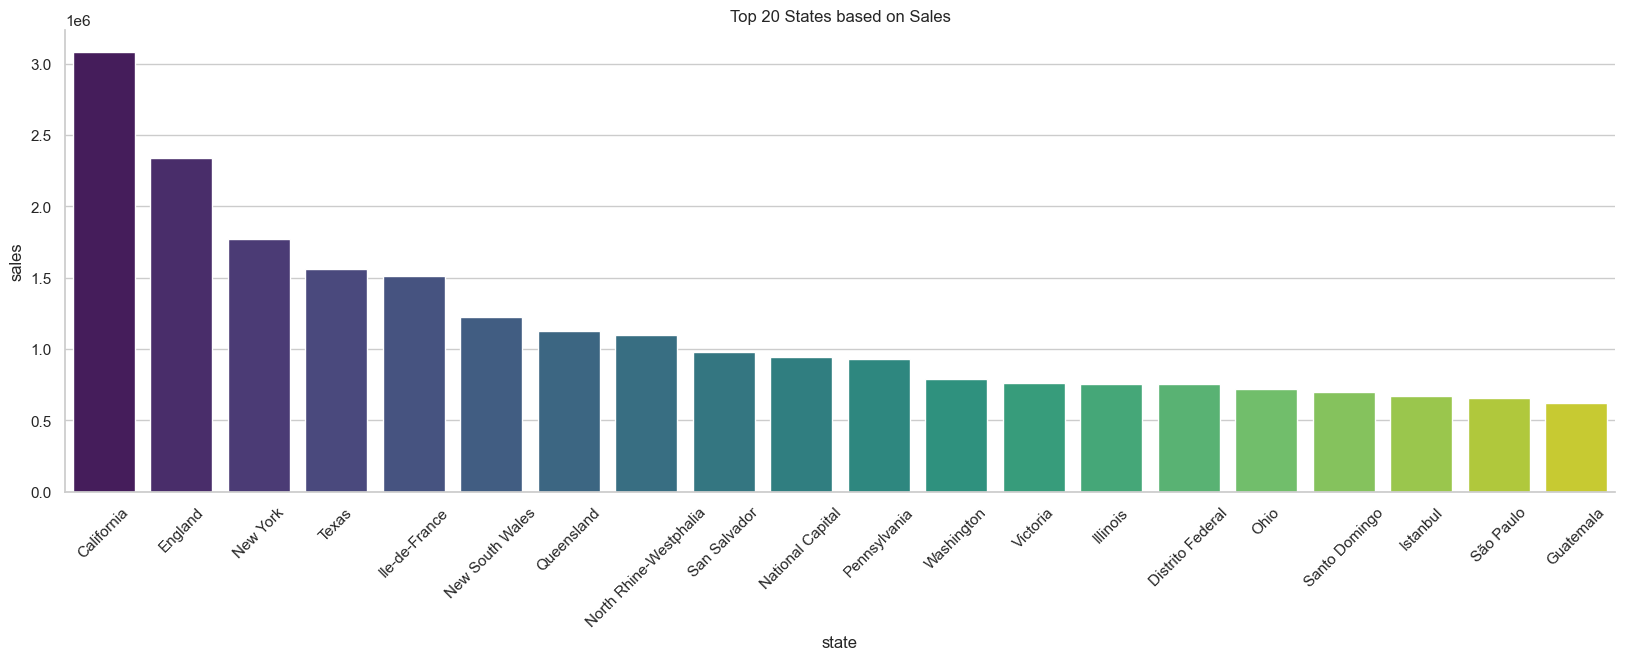

In [24]:
grpcount = pd.DataFrame(df.groupby('state')['sales'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'sales', ascending = False)

top_20_states = grpcount_.iloc[:20]

plt.figure(figsize=(20, 6))
ax = sns.barplot(x='state', y='sales', data=top_20_states, palette='viridis')

ax.set_title('Top 20 States based on Sales')
plt.xticks(rotation=45)

sns.despine()

plt.show()

<div class="alert alert-success">  
<h3><strong>Top 20 Customers by Sales</strong></h3>
</div>

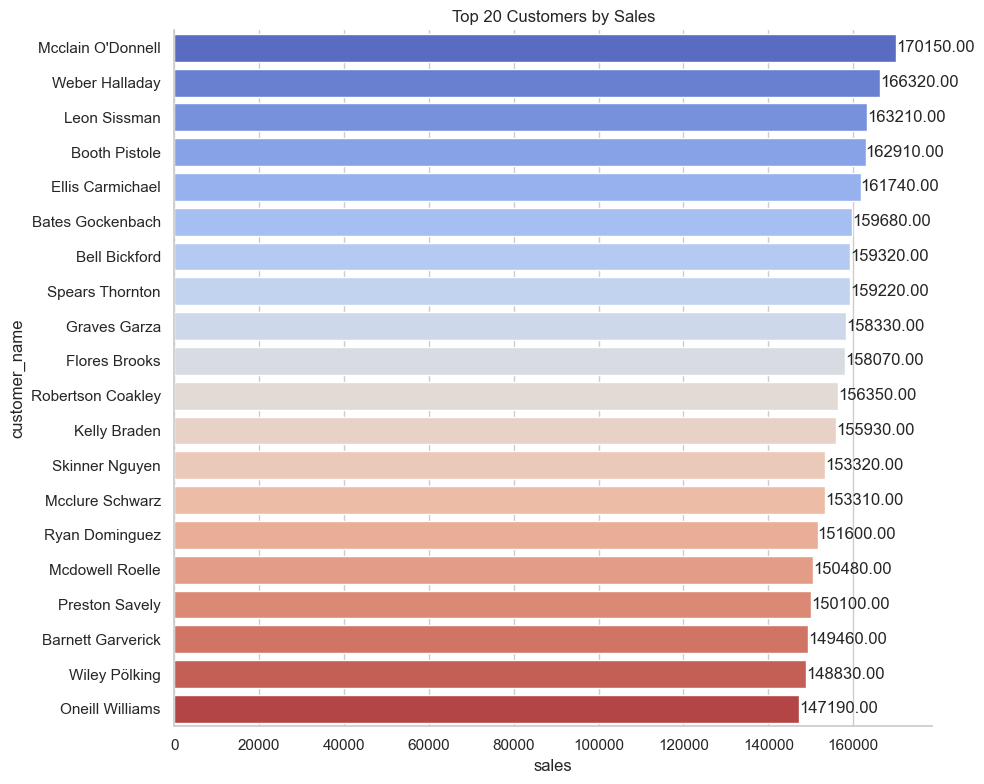

In [25]:
grpcount = pd.DataFrame(df.groupby('customer_name')['sales'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'sales', ascending = False)

top_20_customers = grpcount_.iloc[:20]

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='sales', y='customer_name', data=top_20_customers, palette='coolwarm')

ax.set_title('Top 20 Customers by Sales')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')

plt.tight_layout()

sns.despine()

plt.show()

<div class="alert alert-success">  
<h3><strong>Region-wise Profit Earned</strong></h3>
</div>

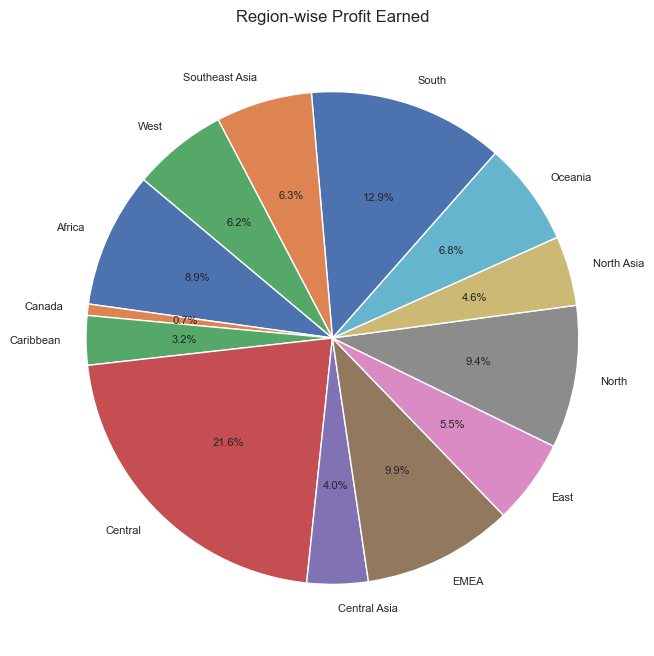

In [26]:
region_profit = df.groupby('region')['profit'].sum().reset_index()
labels = region_profit['region']
sizes = region_profit['profit']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Region-wise Profit Earned')

plt.show()

<div class="alert alert-success">  
<h3><strong>Count of Records by Ship Mode</strong></h3>
</div>

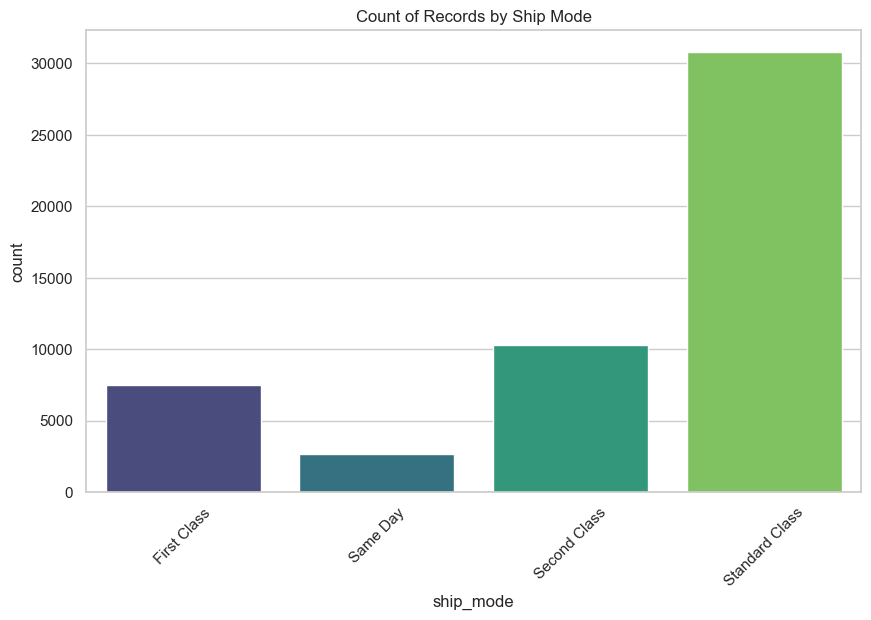

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ship_mode', data=df, palette='viridis')
ax.set_title('Count of Records by Ship Mode')
plt.xticks(rotation=45)

plt.show()

<div class="alert alert-success">  
<h3><strong>Mean Sales per Region by Segment</strong></h3>
</div>

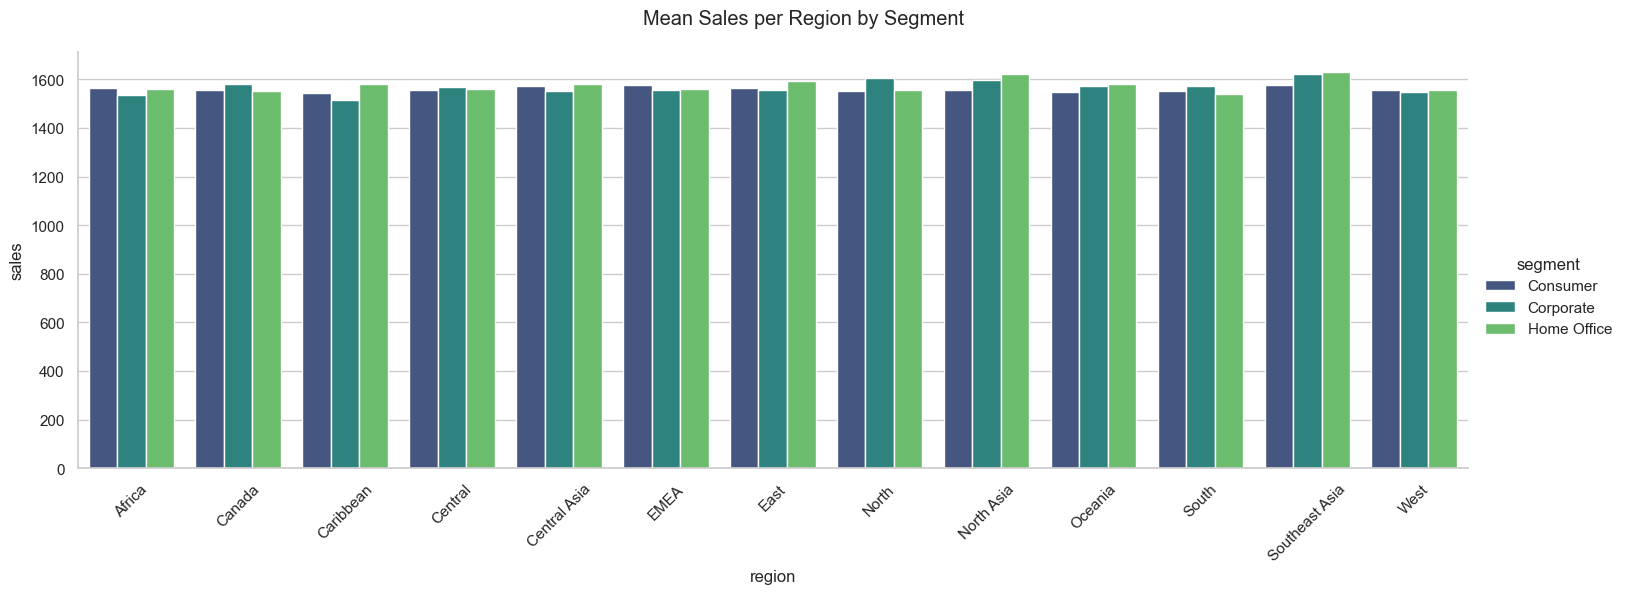

In [28]:
mean_sales = df.groupby(['region', 'segment'])['sales'].mean().reset_index()

g = sns.catplot(x='region', y='sales', hue='segment', data=mean_sales, kind='bar', height=5, aspect=3, palette='viridis')
g.fig.suptitle('Mean Sales per Region by Segment', y=1.05)

plt.xticks(rotation=45)

plt.show()

<div class="alert alert-success">  
<h3><strong>Create Lapsdays Column</strong></h3>
</div>

In [29]:
df.drop(df.index[321],inplace=True)
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['quantity'] = pd.to_numeric(df['quantity'])


df['lapsdays'] = (df['ship_date'] - df['order_date']).dt.days

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51299 entries, 0 to 51299
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   unnamed:_0        51299 non-null  int64         
 1   order_id          51299 non-null  object        
 2   order_date        51299 non-null  datetime64[ns]
 3   ship_date         51299 non-null  datetime64[ns]
 4   aging             51299 non-null  float64       
 5   ship_mode         51299 non-null  object        
 6   product_category  51299 non-null  object        
 7   product           51299 non-null  object        
 8   sales             51299 non-null  float64       
 9   quantity          51299 non-null  int64         
 10  discount          51299 non-null  float64       
 11  profit            51299 non-null  float64       
 12  shipping_cost     51299 non-null  float64       
 13  order_priority    51299 non-null  object        
 14  customer_id       51299 non

<div class="alert alert-success">  
<h3><strong>Mean Lapsdays per Ship Mode by Order Priority</strong></h3>
</div>

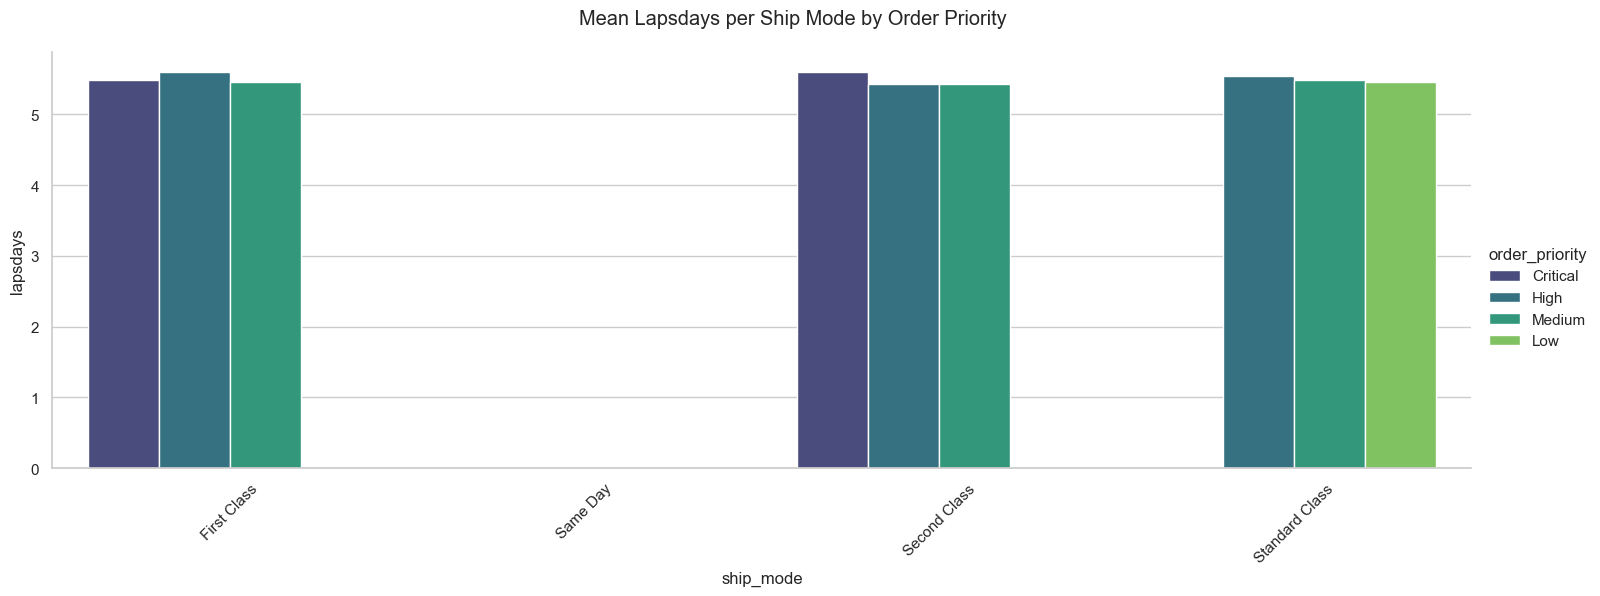

In [31]:
mean_lapsdays = df.groupby(['ship_mode', 'order_priority'])['lapsdays'].mean().reset_index()
g = sns.catplot(x='ship_mode', y='lapsdays', hue='order_priority', data=mean_lapsdays,
                kind='bar', height=5, aspect=3, palette='viridis')
g.fig.suptitle('Mean Lapsdays per Ship Mode by Order Priority', y=1.05)

plt.xticks(rotation=45)

plt.show()

<div class="alert alert-success">  
<h3><strong>Segment Pie to Laps Days</strong></h3>
</div>

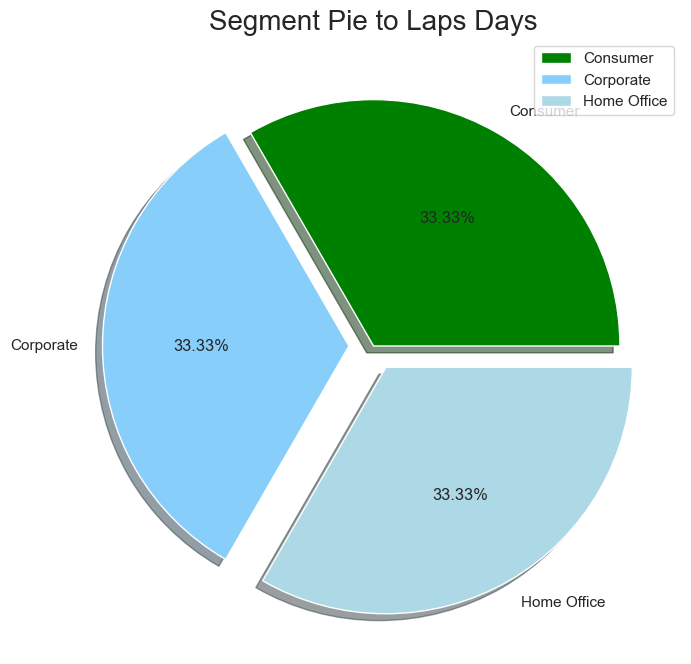

In [32]:
grpcount = pd.DataFrame(df.groupby('segment')['lapsdays'].sum()).reset_index()
grpcount_ = grpcount.sort_values(by = 'lapsdays', ascending = False)

labels = ['Consumer', 'Corporate','Home Office']
size = grpcount_['segment'].value_counts()
colors = ['green', 'lightskyblue','lightblue']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Segment Pie to Laps Days', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

<div class="alert alert-success">  
<h3><strong>Sales Distribution</strong></h3>
</div>

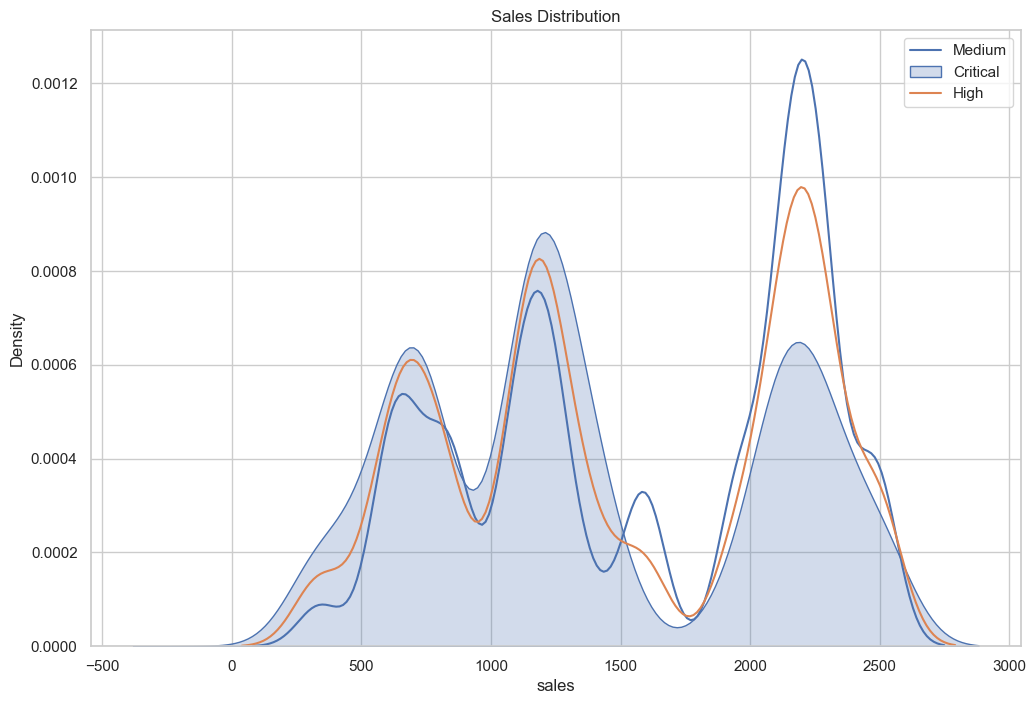

In [33]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['sales'][df.order_priority == 'Medium'], shade=False)
sns.kdeplot(df['sales'][df.order_priority == 'Critical'], shade=True)
sns.kdeplot(df['sales'][df.order_priority == 'High'], shade=False)
plt.legend(['Medium', 'Critical','High'])
plt.title('Sales Distribution')
plt.show()

<div class="alert alert-success">  
<h3><strong>Profit Distribution</strong></h3>
</div>

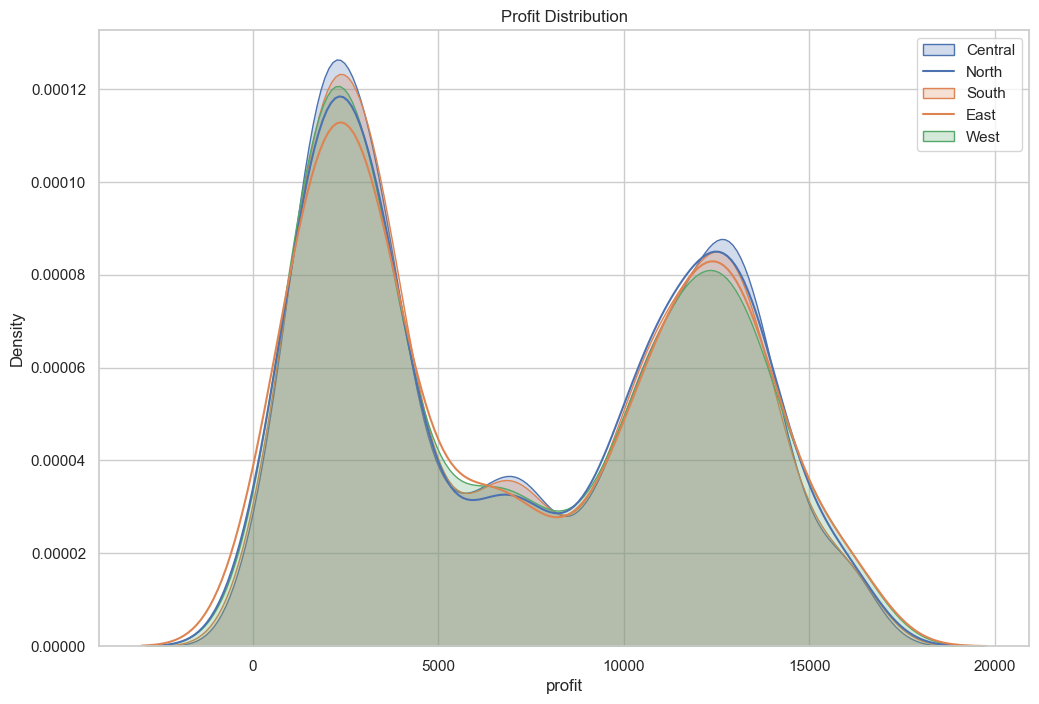

In [34]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['profit'][df.region == 'Central'], shade=True)
sns.kdeplot(df['profit'][df.region == 'North'], shade=False)
sns.kdeplot(df['profit'][df.region == 'South'], shade=True)
sns.kdeplot(df['profit'][df.region == 'East'], shade=False)
sns.kdeplot(df['profit'][df.region == 'West'], shade=True)

plt.legend(['Central', 'North','South','East','West'])
plt.title('Profit Distribution')
plt.show()

<div class="alert alert-success">  
<h3><strong>Line Plot for Profit Earned Segment-wise</strong></h3>
</div>

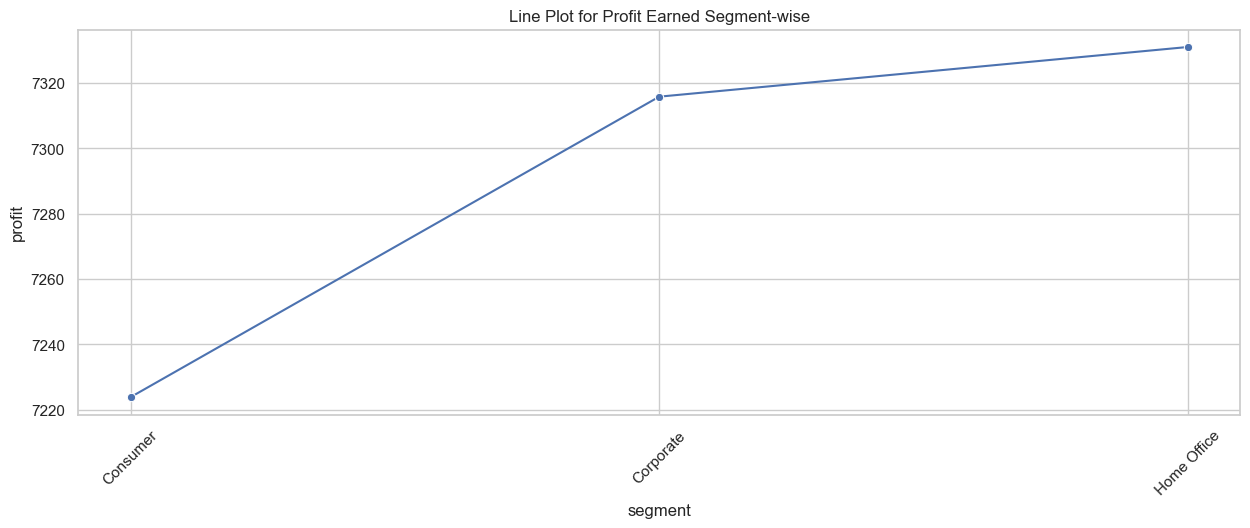

In [35]:
mean_profit = df.groupby('segment')['profit'].mean().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='segment', y='profit', data=mean_profit, marker='o')

ax.set_title('Line Plot for Profit Earned Segment-wise')
plt.xticks(rotation=45)

plt.show()

<div class="alert alert-success">  
<h3><strong>Line Plot for Quantity vs. Ship Mode and Segment</strong></h3>
</div>

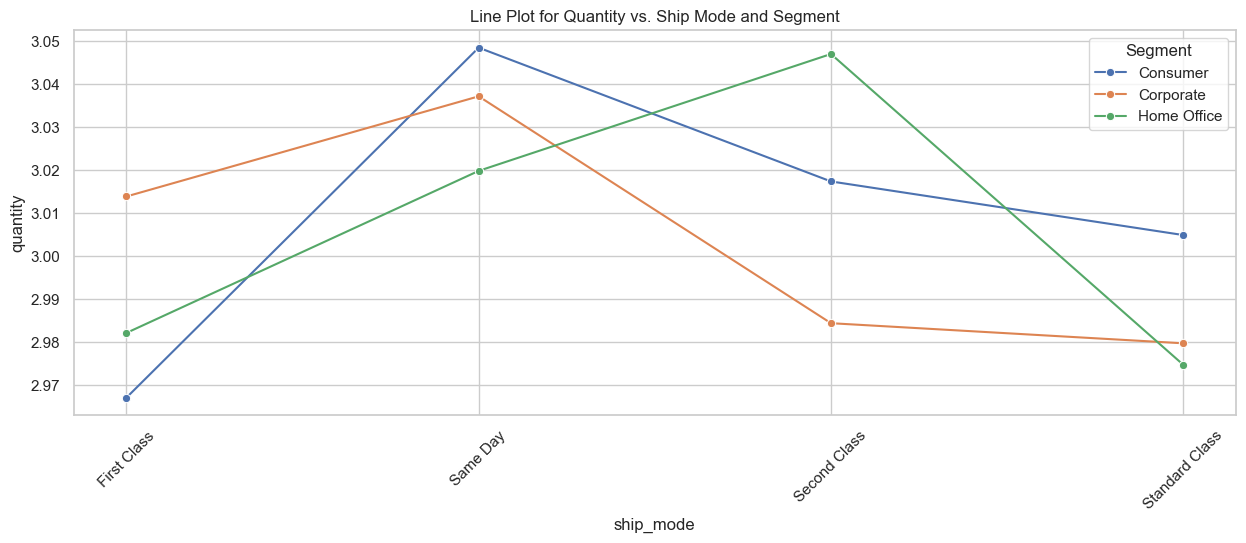

In [36]:
mean_quantity = df.groupby(['ship_mode', 'segment'])['quantity'].mean().reset_index()

plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='ship_mode', y='quantity', hue='segment', data=mean_quantity, marker='o')

ax.set_title('Line Plot for Quantity vs. Ship Mode and Segment')
plt.legend(title='Segment')
plt.xticks(rotation=45)

plt.show()

<div class="alert alert-success">  
<h3><strong>
Segment and Profit vs Ship Mode &
Segment and Sales vs Ship Mode
</strong></h3>
</div>

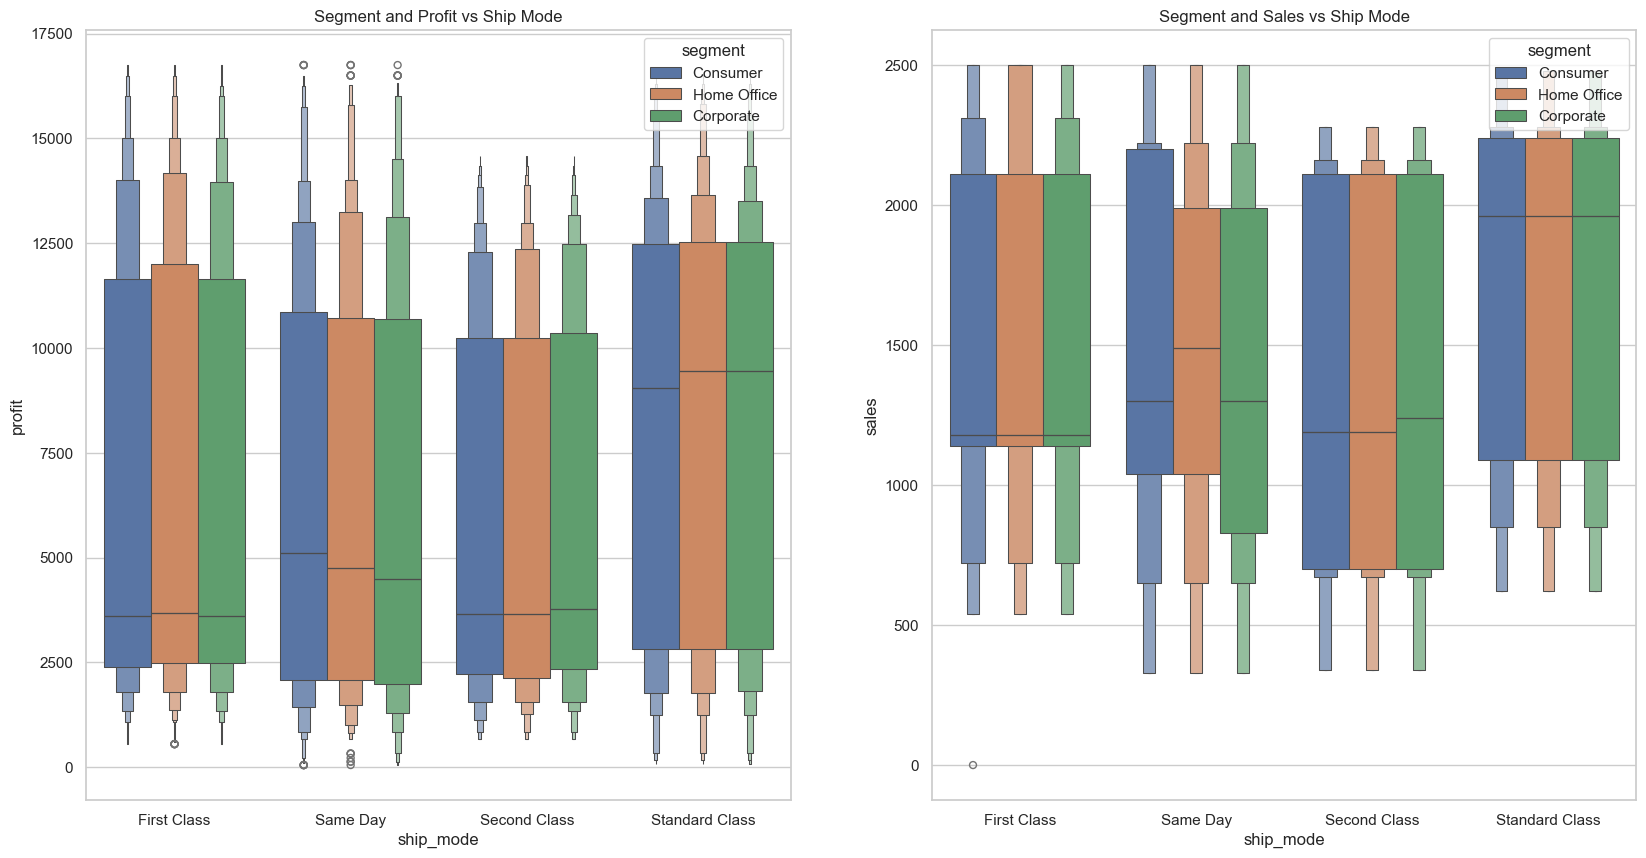

In [37]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.boxenplot(x="ship_mode", y="profit", hue="segment", data=df, ax=ax[0])
ax[0].set_title('Segment and Profit vs Ship Mode')

sns.boxenplot(x="ship_mode", y="sales", hue="segment", data=df, ax=ax[1])
ax[1].set_title('Segment and Sales vs Ship Mode')

plt.show()

<div class="alert alert-success">  
<h3><strong>
Months wise Sales
</strong></h3>
</div>

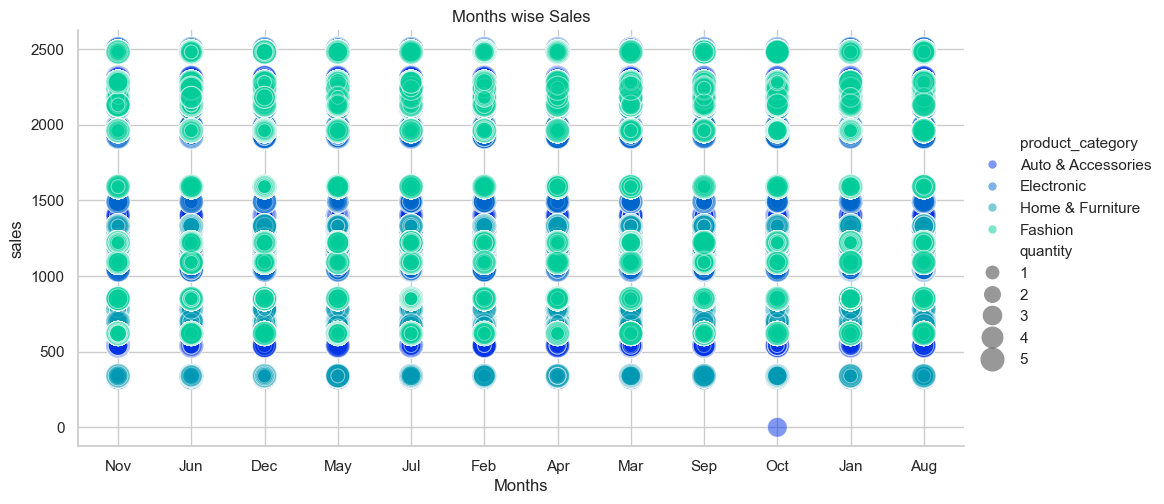

In [38]:
axes = sns.relplot(x="months", y="sales", hue="product_category",
                size="quantity", data=df,palette='winter', sizes=(100, 300),alpha=0.5,aspect=2)
axes.set(xlabel='Months',title="Months wise Sales")

axes.set_xticklabels()

<div class="alert alert-success">  
<h3><strong>
Scatter for Profit and Sales
</strong></h3>
</div>


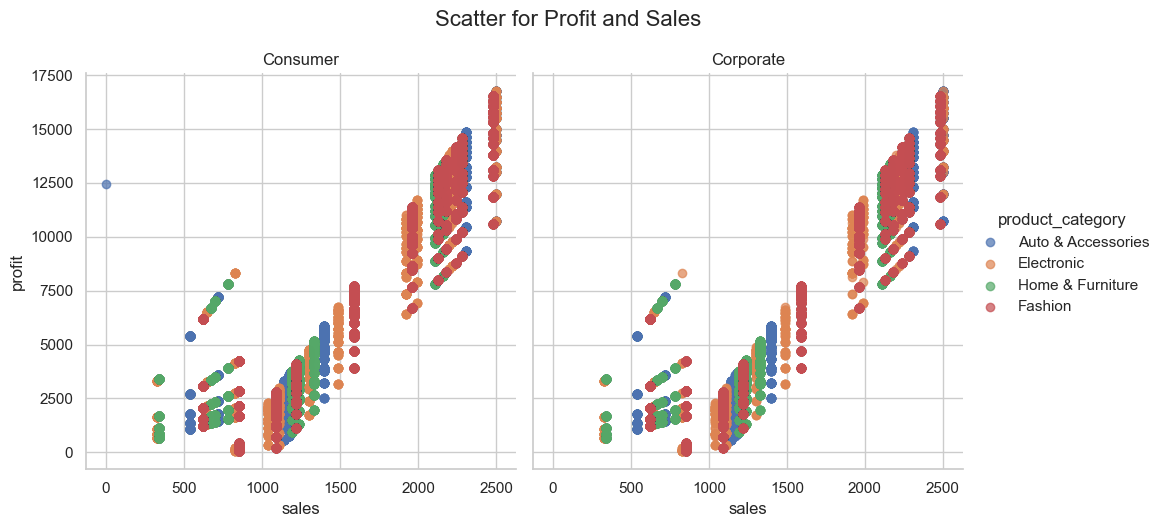

In [39]:
# dxp.scatter(x='sales', y='profit', data=df, split='product_category', col='segment', col_order=['Consumer','Corporate'],title = 'Scatter for Profit and Sales')

g = sns.FacetGrid(df, col='segment', col_order=['Consumer', 'Corporate'], hue='product_category', height=5, aspect=1)
g.map(plt.scatter, 'sales', 'profit', alpha=.7)
g.add_legend()

g.set_titles('{col_name}')
g.fig.suptitle('Scatter for Profit and Sales', fontsize=16, y=1.05)

plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51299 entries, 0 to 51299
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   unnamed:_0        51299 non-null  int64         
 1   order_id          51299 non-null  object        
 2   order_date        51299 non-null  datetime64[ns]
 3   ship_date         51299 non-null  datetime64[ns]
 4   aging             51299 non-null  float64       
 5   ship_mode         51299 non-null  object        
 6   product_category  51299 non-null  object        
 7   product           51299 non-null  object        
 8   sales             51299 non-null  float64       
 9   quantity          51299 non-null  int64         
 10  discount          51299 non-null  float64       
 11  profit            51299 non-null  float64       
 12  shipping_cost     51299 non-null  float64       
 13  order_priority    51299 non-null  object        
 14  customer_id       51299 non

In [43]:
df.columns

Index(['unnamed:_0', 'order_id', 'order_date', 'ship_date', 'aging',
       'ship_mode', 'product_category', 'product', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'region',
       'months', 'lapsdays'],
      dtype='object')

# Homework

Buat analisis tambahan berdasarkan data di atas, gunakan chart sesuai dengan analisis yang dibutuhkan menggunakan Python & Google Data Studio (looker studio)

1.   Bagaimana tren penjualan di benua Asia tahun ke tahun?
2.   Negara mana saja yang memiliki potensti untuk menghasilkan keuntungan (profit) paling besar sesudah urutan pertama?
3.   Siapakah 5 pembeli yang paling banyak membeli (Count) dari data ini?
4.   Dari rata-rata antar region, product category apakah yang paling banyak diminati?
5.   Untuk mencapai maksimum profit, barang apa sajakah yang harus di stok lebih banyak oleh toko untuk kedepannya?

<div class="alert alert-success">  
<h3><strong>
1. Bagaimana tren penjualan di benua Asia tahun ke tahun?
</strong></h3>
</div>

**Membuat Kolom Order Year dan Mempivot Kolom Asia Region, Sales, dan Order Year**

In [44]:
df['order_year'] = pd.to_datetime(df['order_date'], format='%Y').dt.year
asia_counts = df[df['region'].str.contains('Southeast Asia|North Asia|Central Asia')]
df_pivot = pd.pivot_table(asia_counts, values=['sales'], index=['order_year','region']).reset_index()
df_pivot

,order_year,region,sales
0,2015,Central Asia,1567.407227
1,2015,North Asia,1581.369277
2,2015,Southeast Asia,1600.230105


Note: dikarenakan tidak ada penjualan di Asia Region pada tahun 2016 maka visualisasi yang akan ditampilkan hanya pada tahun 2015

<div class="alert alert-success">  
<h3><strong>
Sales in the Asia Region
</strong></h3>
</div>

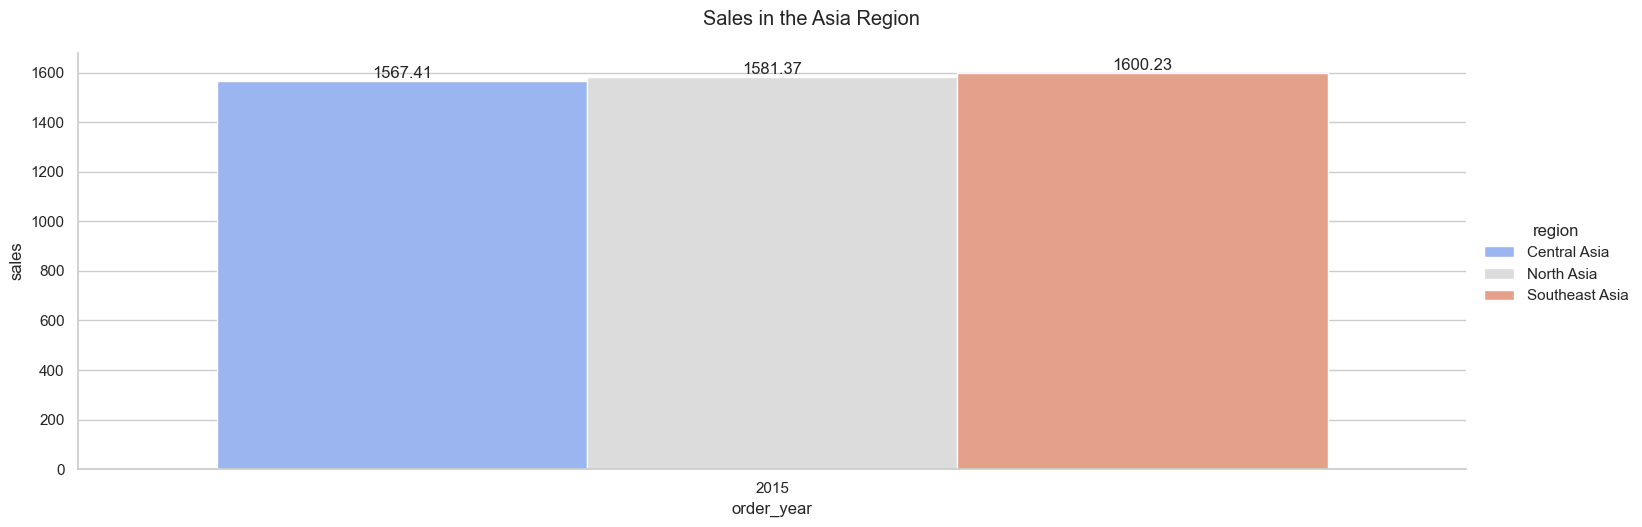

In [45]:
g = sns.catplot(x='order_year', y='sales', hue='region', data=df_pivot, kind='bar', height=5, aspect=3, palette='coolwarm')
g.fig.suptitle('Sales in the Asia Region', y=1.05)

for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')

plt.xticks(rotation=0)
plt.show()

<div class="alert alert-success">  
<h3><strong>
Insight
</strong></h3>
</div>

Berdasarkan grafik di atas diketahui bahwa penjualan di Southeast Asia merupakan yang terbanyak dibandingkan dua region lainnya, yaitu North Asia dan Central Asia. Walaupun demikian, perbedaan di antara ketiga region tersebut tidak terlalu signifikan

<div class="alert alert-success">  
<h3><strong>
2. Negara mana saja yang memiliki potensi untuk menghasilkan keuntungan (profit) paling besar sesudah urutan pertama?
</strong></h3>
</div>

**Mengelompokkan Kolom Country dan Profit**

In [46]:
most_profit = df.groupby('country')['profit'].sum().reset_index()
most_profit_ = most_profit.sort_values(by='profit', ascending=False)
top_20_countries = most_profit_.iloc[:20]

<div class="alert alert-success">  
<h3><strong>
Top 20 Countries by Profit
</strong></h3>
</div>

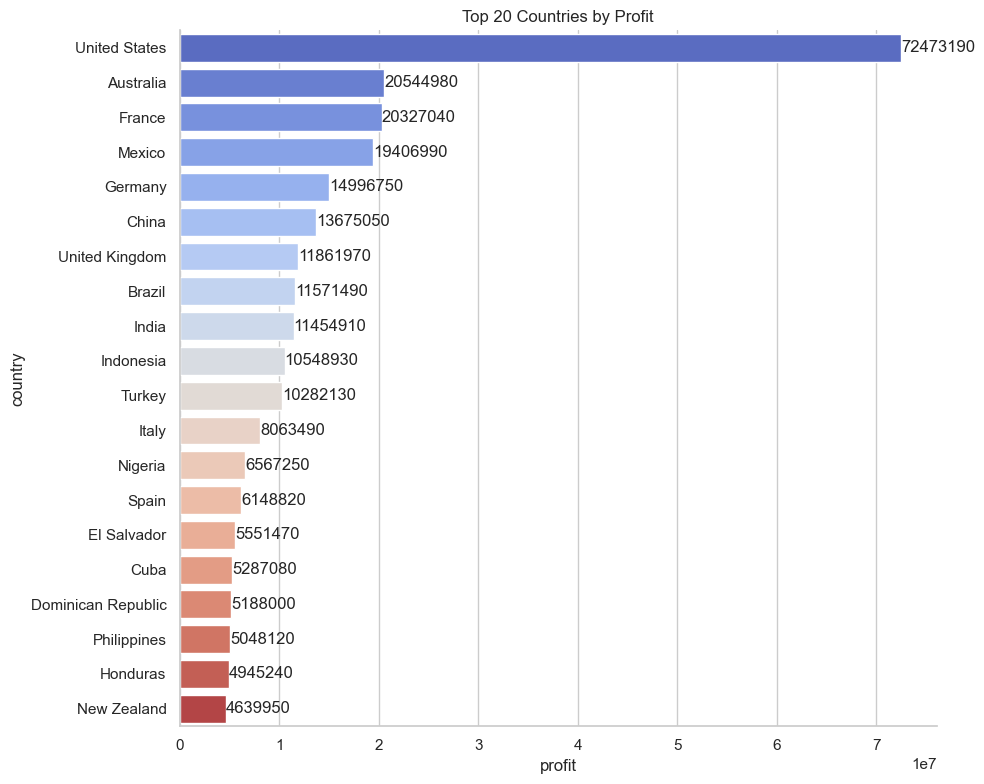

In [47]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='profit', y='country', data=top_20_countries, palette='coolwarm')

ax.set_title('Top 20 Countries by Profit')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.0f}'.format(width),
             ha='left', va='center')

plt.tight_layout()
sns.despine()
plt.show()

<div class="alert alert-success">  
<h3><strong>
Insight
</strong></h3>
</div>

Berdasarkan grafik di atas diketahui bahwa Amerika Serikat merupakan negara dengan penghasilan profit tertinggi dan paling mendominasi dibandingkan negara lainnya. Selain itu, Australia menempati urutan kedua setelah Amerika Serikat. Menariknya, antara Australia dan France saling bersaing dalam mendapatkan keuntungan.

<div class="alert alert-success">  
<h3><strong>
3. Siapakah 5 pembeli yang paling banyak membeli (Count) dari data ini?
</strong></h3>
</div>

**Mengelompokkan Kolom Customer Name dan Quantity**

In [48]:
most_buy = df.groupby('customer_name')['quantity'].sum().reset_index()
most_buy_ = most_buy.sort_values(by = 'quantity', ascending = False)

top_5_customers = most_buy_.iloc[:5]

<div class="alert alert-success">  
<h3><strong>
Top 5 Customers by Number of Orders
</strong></h3>
</div>

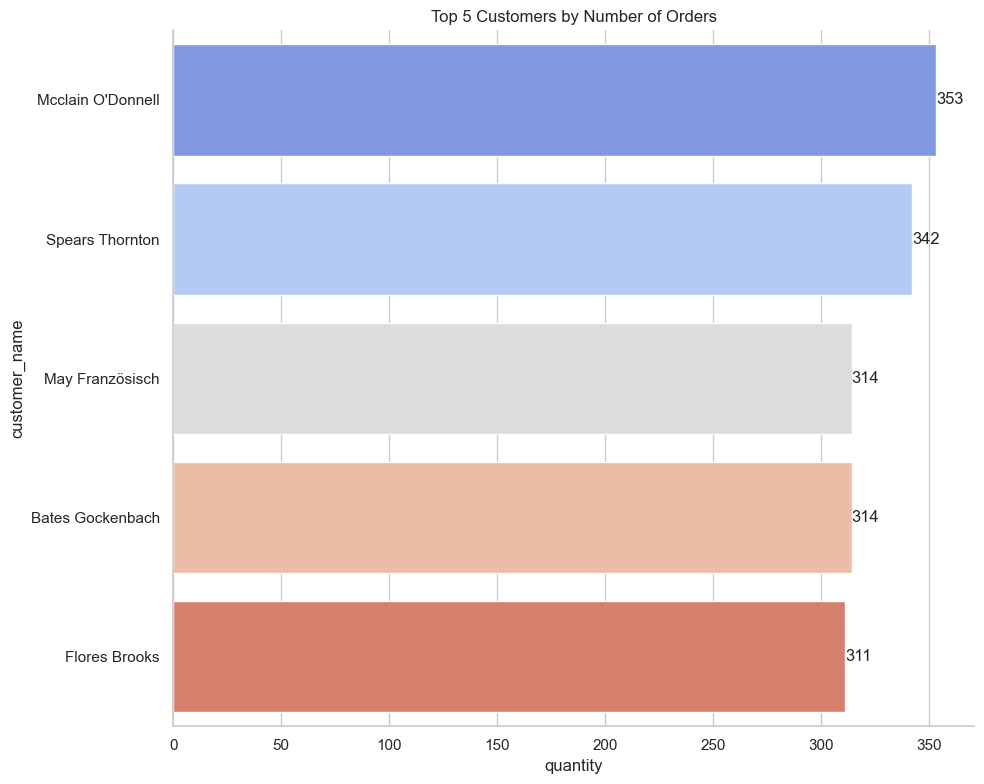

In [49]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='quantity', y='customer_name', data=top_5_customers, palette='coolwarm')

ax.set_title('Top 5 Customers by Number of Orders')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.0f}'.format(width),
             ha='left', va='center')

plt.tight_layout()
sns.despine()
plt.show()

<div class="alert alert-success">  
<h3><strong>
Insight
</strong></h3>
</div>

Berdasarkan grafik di atas diketahui bahwa 5 orang di atas merupakan customer dengan order terbanyak dibandingkan customers lainnya. Ini dapat menjadi salah satu strategi dalam melakukan pendekatan promosi khusus sehingga customers tersebut loyal.

<div class="alert alert-success">  
<h3><strong>
4. Dari rata-rata antar region, product category apakah yang paling banyak diminati?
</strong></h3>
</div>

**Mengelompokkan Kolom Region dan Product Category**

In [50]:
most_category = df.groupby('region')['product_category'].value_counts().reset_index()

<div class="alert alert-success">  
<h3><strong>
Most Order Category Product per Region
</strong></h3>
</div>

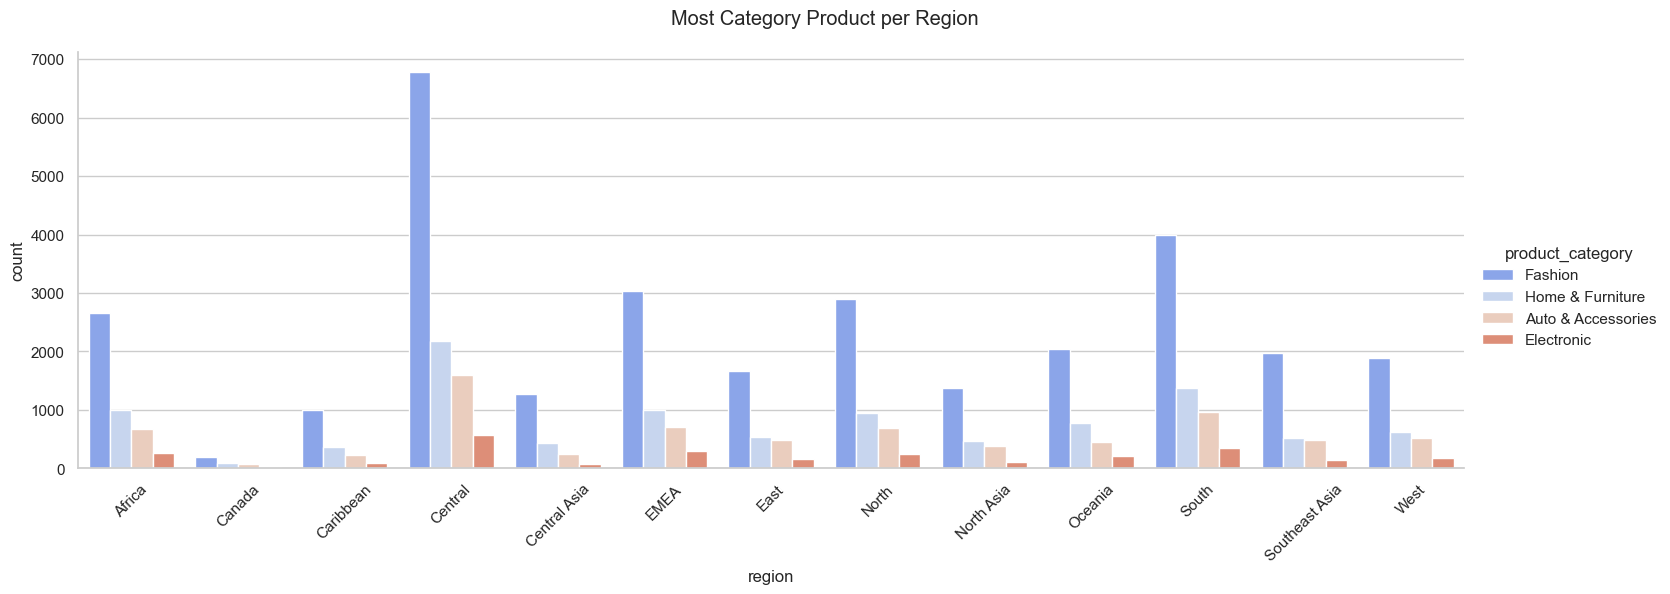

In [51]:
g = sns.catplot(x='region', y='count', hue='product_category', data=most_category,
                kind='bar', height=5, aspect=3, palette='coolwarm')
g.fig.suptitle('Most Category Product per Region', y=1.05)

plt.xticks(rotation=45)
plt.show()

<div class="alert alert-success">  
<h3><strong>
Insight
</strong></h3>
</div>

Berdasarkan grafik di atas diketahui bahwa product category fashion merupakan order terbanyak dari setiap region. Sementara itu, electronic menjadi product category yang diorder paling sedikit. Kemungkinan, ini dipengaruhi oleh harga masing-masing product category. Artinya bahwa fashion merupakan product yang relatih lebih murah dibandingkan product lainnya. Selain itu, ini menandakan, mungkin, segmen pasar dari fashion menyesuaikan terhadap kelas ekonominya. Oleh karena itu, ini dapat menjadi product potensial untuk dipertahankan atau ditingkatkan kedepannya.

<div class="alert alert-success">  
<h3><strong>
5. Untuk mencapai maksimum profit, barang apa sajakah yang harus di stok lebih banyak oleh toko untuk kedepannya?
</strong></h3>
</div>

**Mengelompokkan Kolom Product Category dan Profit**

In [52]:
profit_strategy = df.groupby('product_category')['profit'].sum().reset_index()
profit_strategy_ = profit_strategy.sort_values(by='profit', ascending=False)

<div class="alert alert-success">  
<h3><strong>
Strategy to Maximize Profit
</strong></h3>
</div>

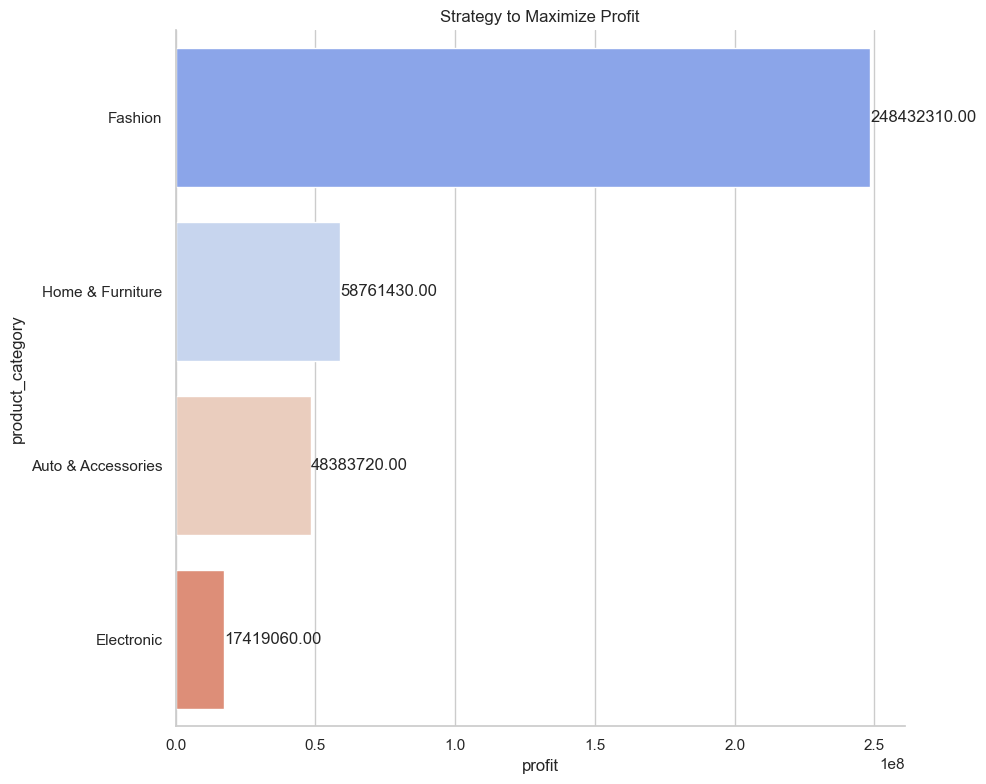

In [53]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='profit', y='product_category', data=profit_strategy_, palette='coolwarm')

ax.set_title('Strategy to Maximize Profit')

for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + p.get_height() / 2.,
             '{:1.2f}'.format(width),
             ha='left', va='center')

plt.tight_layout()

sns.despine()

plt.show()

<div class="alert alert-success">  
<h3><strong>
Insight
</strong></h3>
</div>

Berdasarkan grafik di atas diketahui bahwa product category fashion menghasilkan profit terbanyak dibanding product lainnya. Artinya bahwa fashion merupakan product yang relatih lebih murah dibandingkan product lainnya. Selain itu, ini menandakan, mungkin, segmen pasar dari fashion menyesuaikan terhadap kelas ekonominya. Oleh karena itu, ini dapat menjadi product potensial untuk dipertahankan atau ditingkatkan kedepannya.